In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
from PIL import Image
import sys
figure1 = Image.open('fig1.png','r') 
figure1.thumbnail(size=(550,350))

\begin{problem}
The base plate of an iron has a thickness of $L = 7 mm$ and is made from an aluminum alloy ($\rho= 2800 kg/m^3$,
$c = 900 J/kgK$, $k = 180 W/mK$, $\epsilon=0.80$). An electric resistance heater is attached to the inner surface of
the plate, while the outer surface is exposed to ambient
air and large surroundings at $T_{\infty} = Tsur = 25 ^\circ{C}$. The areas of both the inner and outer surfaces are $A_s = 0.040 m2$.

If an approximately uniform heat flux of ${q_h}^{"} = 1.25\times10^4 $  is applied to the inner surface of the base
plate and the convection coefficient at the outer surface
is $h = 10 W/m^2 K$, estimate the time required for the
plate to reach a temperature of $135 ^\circ{C}$
\end{problem}

Hint: Numerical
integration is suggested in order to solve the problem.

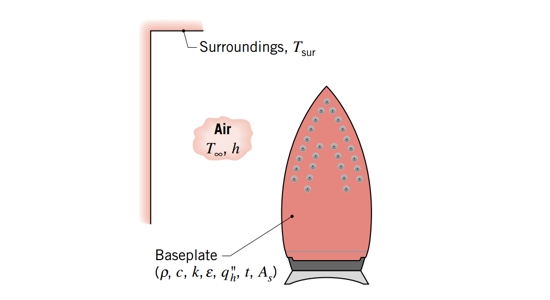

In [2]:
figure1

In [3]:
#define parameters
L       = 0.007         #Thickness
rho     = 2800          #Density
c       = 900           #Specific heat
k       = 180           #Thermal conductivity
h       = 10            #Heat transfer coefficient
epsilon = 0.8           #Emmisivity
A       = 0.040         #Area
q       = 1.25*10**4    #Heat flux
V       = A*L           #Volume
Tsur    = 25+273        #Ambient temperature (K)
sigma   = 5.67*10**-8   #Emissivity
dt      = 1             #time step
Tinf    = Tsur

In [4]:
#Numerical solution
t       = np.arange(0,250,1)
n       = len(t)
T       = np.ones(n)
T[0]    = Tinf 
for i in range(0,n-1):
    T[i+1] = T[i]+((A*dt/(rho*V*c))*(q-(h*(T[i]-Tinf))-(epsilon*sigma*((T[i])**4-(Tsur)**4))))

We seek the time required for the plate to reach a temperature of T = $135 ^\circ{C} = 408$ K

In [5]:
T  = np.round(T)         #rounded temperature values
Tc = T-273               #converts the temperature values to degrees Celsius
a  = np.where(T == 408)  #gets the time that it takes to reach the temperature of T=135 °C

In [6]:
print('We find that the time required for the plate to reach a temperature of T = 135 °C is t = {} s'.format(*a))

We find that the time required for the plate to reach a temperature of T = 135 °C is t = [168] s


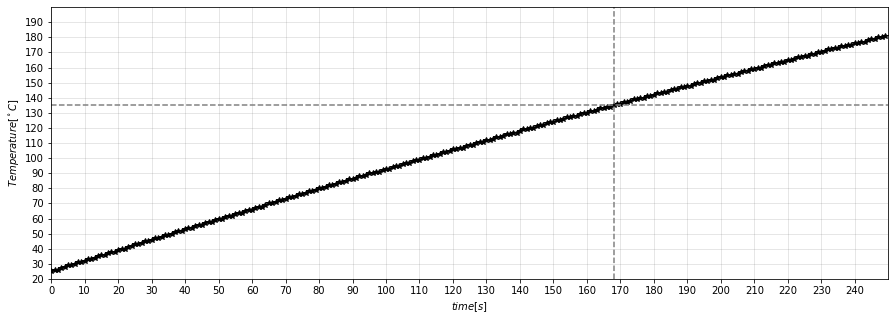

In [7]:
#Plot T(t)
plt.figure(figsize=(15,5))
plt.plot(t,Tc,'*-',color='black')
plt.ylabel("$Temperature [^\circ{C}]$")
plt.xlabel("$time[s]$")
plt.xlim(0,250)
plt.ylim(20,200)
plt.yticks(np.arange(20,200,10))
plt.xticks(np.arange(0,250,10))
plt.grid( which='major', color='#666666', linestyle='-',alpha=0.2)
plt.hlines(y=135,xmin=0,xmax=250,color='gray',linestyle='--')
plt.vlines(x=168,ymin=20,ymax=200,color='gray',linestyle='--')
plt.show()